# Picture processing when received


* extract colours (paleta picture)
* extract colours elements (maybe contours) and from those, isolate elements (lst of elements)
* for the same colour elements:
    * check wether some elements can be grouped as one element (same bruch stroke) or not, identify same stroke elements probabilities from skeletonize??
    * isolate identified distinct elements again 
    
   

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df_colours=pd.read_csv('./data/tmp/tmp_df_colours.csv')  

In [21]:
df_colours.R.iloc[0]

112

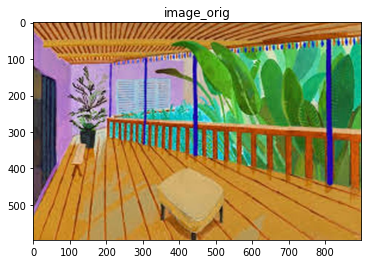

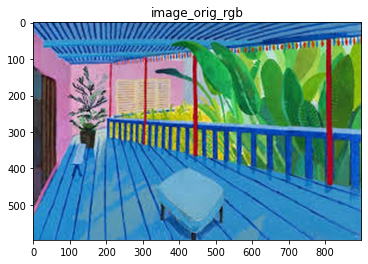

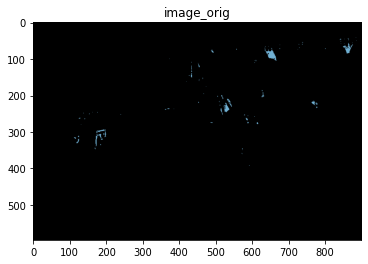

In [36]:
path="./data/tmp/"
nameInFile="resize_tmp_file.jpg"
nameOutContFile="resize_tmp_file_countours.jpg"

image = cv2.imread(path + nameInFile)
plt.imshow(image)
plt.title("image_orig")
plt.show()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("image_orig_rgb")
plt.show()
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2] 

k_index=20
range_c=20

red_c, green_c, blue_c =df_colours.R.iloc[k_index],df_colours.G.iloc[k_index],df_colours.B.iloc[k_index]

mask_c = (red >= red_c -range_c) &  (red <= red_c +range_c)  & (green >= green_c -range_c ) & (green <= green_c +range_c)  & (blue >= blue_c -range_c)&  (blue <= blue_c +range_c)
mask_else= ~mask_c
image[:,:,:3][mask_c]=[df_colours.R.iloc[0],df_colours.G.iloc[0],df_colours.B.iloc[0]]
image[:,:,:3][mask_else]=[0,0,0]

plt.imshow(image)
plt.title("image_orig")
plt.show()

In [12]:


image = (255-image)    

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #to gray scale
plt.imshow(gray)
plt.title("gray_orig")
plt.show()

scale_percent= 600/gray.shape[1] #percent of established width in order to have all inputs in same scale for a later application a minimum area

width = int(gray.shape[1] * scale_percent )
height = int(gray.shape[0] * scale_percent )

# resize image
gray = cv2.resize(gray, (width, height))
image = cv2.resize(image, (width, height))
image0 = image.copy()

plt.imshow(image)
plt.title("image_transform")
plt.show()

plt.imshow(gray)
plt.title("gray_transform")
plt.show()  

# elimino este transformacion (canny), demasiado accurate y da lugar a open contours
#canny = cv2.Canny(gray, 10, 150)
#canny = cv2.dilate(canny, None, iterations=1)
#canny = cv2.erode(canny, None, iterations=1)
#print("canny")
#plt.imshow(canny)
#plt.show()

contours,hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

threshold_area =75  

new_contours=[]    

for i,cnt in enumerate(contours):        
    area = cv2.contourArea(cnt)         

    if area > threshold_area:             
        new_contours.append(cnt)
        cv2.drawContours(image, contours,i, (0,255,0), 3)  # se marcan los contours en verde

plt.imshow(image)
plt.title("contours")
plt.show()  

#path_contours=path 
#cv2.imwrite(path_contours + nameOutContFile, image) # almacenamos en un fichero la salida para seguimiento-validación    
    

NameError: name 'mask_white' is not defined

 https://goodboychan.github.io/python/datacamp/vision/2020/08/02/02-Image-restoration-Noise-Segmentation-and-Contours.html

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)

In [9]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

/tmp/ipykernel_3537/2048590606.py:12: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(face_image, n_segments=100)
/tmp/ipykernel_3537/2048590606.py:15: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, face_image, kind='avg')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


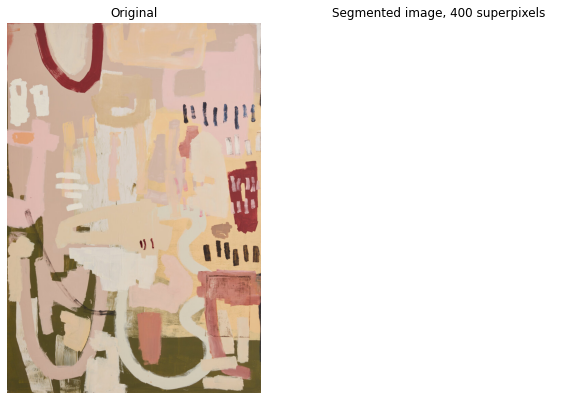

In [11]:
from skimage.segmentation import slic
from skimage.color import label2rgb


path="./data/"
nameInFile="AH01.jpg"


face_image = plt.imread(path + nameInFile)

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments=100)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
plot_comparison(face_image, segmented_image, 'Segmented image, 400 superpixels')

In [13]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

In [14]:
from skimage import measure, data

# Obtain the horse image
horse_image =  plt.imread(path + nameInFile)

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, level=0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

ValueError: Only 2D arrays are supported.

In [ ]:
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image = plt.imread('./dataset/chinese.jpg')

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments=400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
plot_comparison(face_image, segmented_image, 'Segmented image, 400 superpixels')